In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from sklearn.svm import SVC

In [ ]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")
df_full = pd.concat([df_train, df_test])

df_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


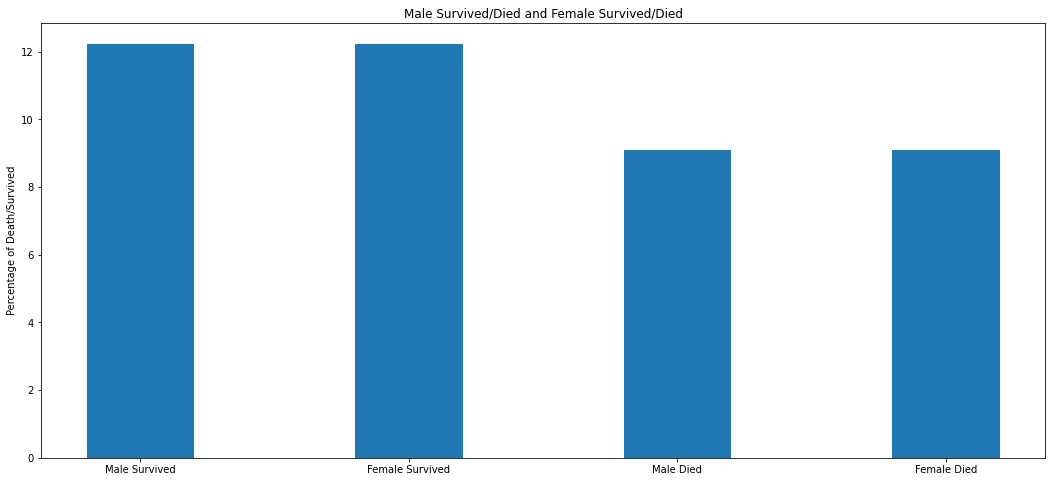

In [ ]:
fig = plt.gcf()

fig.set_size_inches(18, 8)

male_survived = df_train.loc[(df_train.Sex == "male") & (df_train.Survived == 1)].shape[0] / df_train.shape[0] * 100
female_survived = df_train.loc[(df_train.Sex == "male") & (df_train.Survived == 1)].shape[0] / df_train.shape[0] * 100
male_died = df_train.loc[(df_train.Sex == "female") & (df_train.Survived == 0)].shape[0] / df_train.shape[0] * 100
female_died = df_train.loc[(df_train.Sex == "female") & (df_train.Survived == 0)].shape[0] / df_train.shape[0] * 100


ax = plt.bar(x = [2, 4, 6, 8], height=[male_survived, female_survived, male_died, female_died], )
plt.ylabel("Percentage of Death/Survived")
plt.xticks([2, 4, 6, 8], ["Male Survived", "Female Survived", "Male Died", "Female Died"])
plt.title("Male Survived/Died and Female Survived/Died")
plt.show()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


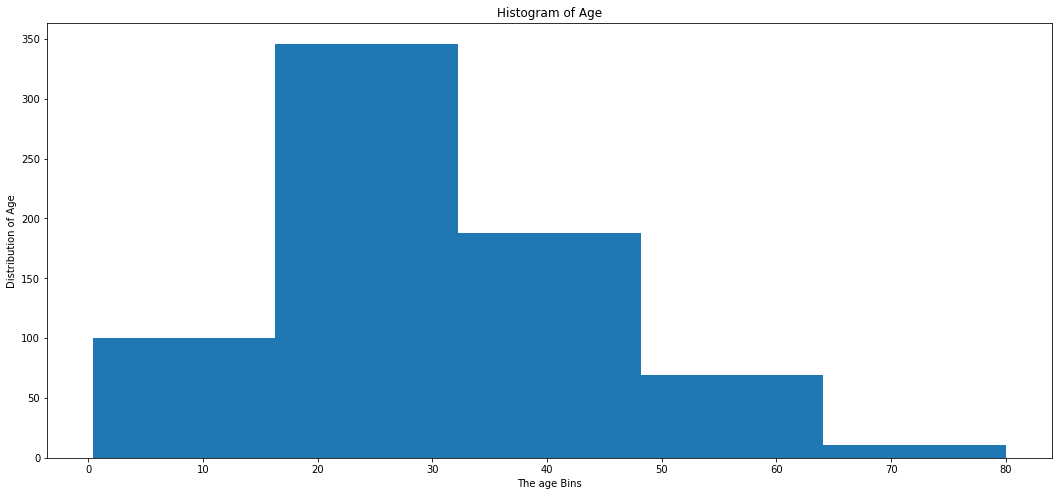

In [ ]:
fig = plt.gcf()

fig.set_size_inches(18, 8)

ax = plt.hist(df_train["Age"], bins=5)

plt.ylabel("Distribution of Age")
plt.xlabel("The age Bins")
plt.title("Histogram of Age")

plt.show()

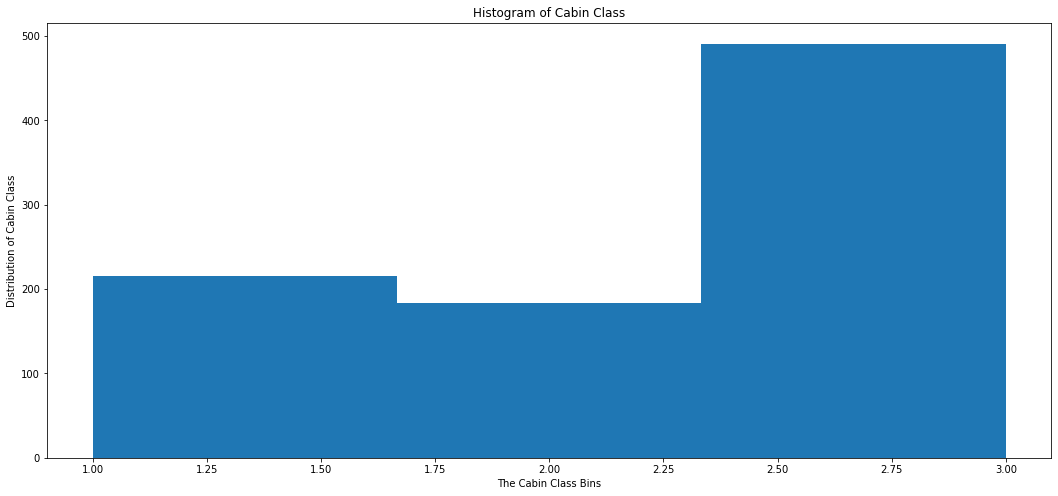

In [ ]:
fig = plt.gcf()

fig.set_size_inches(18, 8)

ax = plt.hist(df_train["Pclass"], bins=3)

plt.ylabel("Distribution of Cabin Class")
plt.xlabel("The Cabin Class Bins")

plt.title("Histogram of Cabin Class")

plt.show()

<Figure size 1296x576 with 0 Axes>

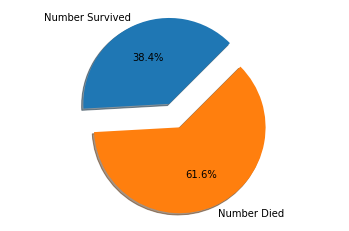

In [ ]:
fig = plt.gcf()

fig.set_size_inches(18, 8)

num_survived = df_train.loc[df_train.Survived == 1].shape[0]
num_died = df_train.loc[df_train.Survived == 0].shape[0]

labels = 'Number Survived', 'Number Died'
sizes = [num_survived, num_died]
explode = (0.2, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [ ]:
df_X = df_train.loc[:, ["Sex", "Pclass"]]
df_y = df_train.loc[:, "Survived"]

le_sex = LabelEncoder()
le_sex.fit(df_X["Sex"])
df_X["Sex"] = le_sex.transform(df_X["Sex"])

print(df_X)
print(df_y)

     Sex  Pclass
0      1       3
1      0       1
2      0       3
3      0       1
4      1       3
..   ...     ...
886    1       2
887    0       1
888    0       3
889    1       1
890    1       3

[891 rows x 2 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_X, df_y, train_size=0.9)

In [ ]:
estimator = Perceptron()
para_grids = {
            "penalty" : ['l2','l1','elasticnet'],
            "alpha" : [0.000001,0.0001, 0.1],
            "fit_intercept": [True, False], 
            "shuffle": [True, False],
            "max_iter": [100, 500, 1000],
            "early_stopping": [True, False]           
        }


grid = GridSearchCV(estimator, para_grids, scoring='f1')
grid.fit(x_train, y_train)
pcpt = grid.best_estimator_

reg_prediction=pcpt.predict(x_test)

print(grid.best_score_, grid.best_params_)

f1 = f1_score(y_test, reg_prediction)

f1

0.668529130815792 {'alpha': 0.0001, 'early_stopping': False, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'shuffle': True}


0.3684210526315789

In [ ]:
estimator = SGDClassifier()
para_grids = {            
            "loss" : ['log', 'modified_huber', 'squared_hinge'],          
            "learning_rate": ["optimal", "invscaling", "adaptive"],
            "average": [True, False],
            "eta0": [0.01, 0.5, 0.9]           
        }


grid = GridSearchCV(estimator, para_grids, scoring='f1')
grid.fit(x_train, y_train)
pcpt = grid.best_estimator_

reg_prediction=pcpt.predict(x_test)

print(grid.best_score_, grid.best_params_)

f1 = f1_score(y_test, reg_prediction)

f1

0.7163738342611274 {'average': True, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'log'}


0.6296296296296297

In [ ]:
model = Sequential()
model.add(Dense(500, input_dim=2))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(1))
model.add(Activation('sigmoid'))

rms = RMSprop()
model.compile(loss='binary_crossentropy', optimizer=rms, metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=20, shuffle=True)

Epoch 1/20
26/26 [==============================] - 0s 5ms/step - loss: 0.4726 - accuracy: 0.7878
Epoch 2/20
26/26 [==============================] - 0s 4ms/step - loss: 0.4803 - accuracy: 0.7790
Epoch 3/20
26/26 [==============================] - 0s 5ms/step - loss: 0.4696 - accuracy: 0.7928
Epoch 4/20
26/26 [==============================] - 0s 5ms/step - loss: 0.4648 - accuracy: 0.7828
Epoch 5/20
26/26 [==============================] - 0s 5ms/step - loss: 0.4755 - accuracy: 0.7790
Epoch 6/20
26/26 [==============================] - 0s 4ms/step - loss: 0.4659 - accuracy: 0.7853
Epoch 7/20
26/26 [==============================] - 0s 4ms/step - loss: 0.4647 - accuracy: 0.7828
Epoch 8/20
26/26 [==============================] - 0s 4ms/step - loss: 0.4645 - accuracy: 0.7828
Epoch 9/20
26/26 [==============================] - 0s 4ms/step - loss: 0.4601 - accuracy: 0.7840
Epoch 10/20
26/26 [==============================] - 0s 4ms/step - loss: 0.4731 - accuracy: 0.7828
Epoch 11/20
26/26 [

In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.4586 - accuracy: 0.7667


[0.45862990617752075, 0.7666666507720947]

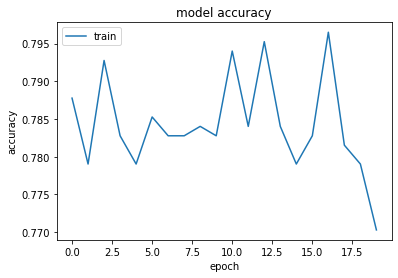

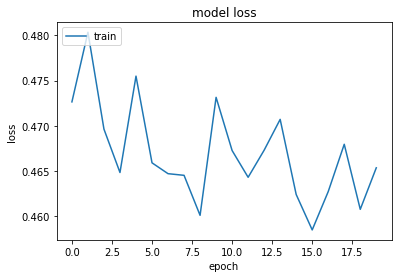

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
estimator = SVC()
para_grids = {
            "C" : [1, 5, 8, 10],
            "kernel" : ["linear", "poly", "rbf"],
            "degree": [1, 3, 5]          
        }


grid = GridSearchCV(estimator, para_grids, scoring='f1')
grid.fit(x_train, y_train)
pcpt = grid.best_estimator_

reg_prediction=pcpt.predict(x_test)

print(grid.best_score_, grid.best_params_)

f1 = f1_score(y_test, reg_prediction)

f1

0.701807919569627 {'C': 1, 'degree': 1, 'kernel': 'linear'}


0.7692307692307692